<div style="background-color:rgba(255, 0, 0, 0.1)"> 

# Submitted by: Umer Farooq
# Program: Data Analysis Nanodegree
# Project 5: Wrangle and Analyze Data
    
</div>

<div style="background-color:rgba(255, 0, 0, 0.15)">    

# Gathering data

</div>

<div style="background-color:rgba(0, 225, 0, 0.15)">    

### We had to use the provided json file for twitter data instead acquiring data from the twitter API. Twitter api code provided on the project page has been pasted below.

</div>

In [1]:
# Importing required libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from IPython.display import display as disp

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

%matplotlib inline

In [2]:
# creating twitter archive enhanced into a dataframe to be used in the twitter api code

# reading and storing the provided twitter archive file which is in csv (comma separated values) format
twitter_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            break
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Fail
1.1530661999999996
{892420643555336193: TweepError([{'code': 89, 'message': 'Invalid or expired token.'}])}


<div style="background-color:rgba(0, 225, 0, 0.15)">    

### Reading and storing data into pandas dataframes

</div>

In [4]:
# twitter archive data was read earlier into a datarame called twitter_df

# reading and storing the provided image predictions file which is in json format
twitter_json_df = pd.read_json('tweet-json.txt', lines=True)

# Downloading the image predictions file
request_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
url_response = requests.get(request_url)
with open('image-predictions.tsv', mode = 'wb') as file:
        file.write(url_response.content)
        
# reading and storing the downloaded image predictions file which is in tsv (tab separated values) format
image_predictions_df = pd.read_csv('image-predictions.tsv', sep = '\t')

In [5]:
# Saving all files as csv (that are not already in csv format) to open and visualize in excel

twitter_json_df.to_csv('twitter_json.csv', index = False)
image_predictions_df.to_csv('image_predictions.csv', index = False) 

<div style="background-color:rgba(255, 0, 0, 0.15)">    

# Assessing data

</div>

<div style="background-color:rgba(0, 225, 0, 0.15)">    

### Visually assessing data (files were also visualized using excel)

</div>

In [6]:
twitter_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [7]:
twitter_json_df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [8]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


<div style="background-color:rgba(0, 225, 0, 0.15)">    

### Programatically assessing data

</div>

In [9]:
# checking for common column names in the twitter data frames
all_columns = pd.Series(list(twitter_df) + list(twitter_json_df))
all_columns[all_columns.duplicated()]

25                   source
26    in_reply_to_status_id
28      in_reply_to_user_id
dtype: object

In [10]:
# Assessing the twitter_df data frame

disp(twitter_df.head(1))

# checking for missing data and asessing data types 
disp(twitter_df.info())

# checking for validity and accuracy issues in values
disp(twitter_df.describe())

# checking dog stage columns value_counts
disp(twitter_df.doggo.value_counts())
disp(twitter_df.floofer.value_counts())
disp(twitter_df.pupper.value_counts())
disp(twitter_df.puppo.value_counts())
disp(twitter_df.name.value_counts())
# checking source column value_counts
disp(twitter_df['source'].value_counts())

# checking rating_denominator column value_counts
disp(twitter_df['rating_denominator'].value_counts())

# checking name column value_counts
disp(twitter_df['name'].value_counts())

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

None

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


None     2259
doggo      97
Name: doggo, dtype: int64

None       2346
floofer      10
Name: floofer, dtype: int64

None      2099
pupper     257
Name: pupper, dtype: int64

None     2326
puppo      30
Name: puppo, dtype: int64

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
Nigel        1
Gin          1
Kial         1
Jed          1
Crouton      1
Name: name, Length: 957, dtype: int64

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
Nigel        1
Gin          1
Kial         1
Jed          1
Crouton      1
Name: name, Length: 957, dtype: int64

In [11]:
disp(twitter_json_df.head(1))

# checking for missing data and asessing data types 
disp(twitter_json_df.info())

# checking for validity and accuracy issues in values
disp(twitter_json_df.describe())

disp(twitter_json_df['truncated'].value_counts())

# The display_text_range column has data stored as lists instead of strings, so it does not need to be split for tidiness

# For example lets look at the first element of the display_text_range column
twitter_json_df.loc[0,'display_text_range'][1] - twitter_json_df.loc[0,'display_text_range'][0]

# we can see that the result printed is 85

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

None

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


False    2354
Name: truncated, dtype: int64

85

In [12]:
disp(image_predictions_df.head())

# checking for missing data and asessing data types 
disp(image_predictions_df.info())

# checking for validity and accuracy issues in values
disp(image_predictions_df.describe())

# checking if all values in probability columns are in order
disp((image_predictions_df['p1_conf'] > image_predictions_df['p2_conf']).all())
disp((image_predictions_df['p2_conf'] > image_predictions_df['p3_conf']).all())

# checking the value_counts on the img_num column
disp(image_predictions_df['img_num'].value_counts())

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


None

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


True

True

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

<div style="background-color:rgba(0, 255, 0, 0.15)">    

## Quality Issues
    
</div>

<div style="background-color:rgba(0, 225, 0, 0.08)">    
    
### `twitter archive` data
- **[erroneous data type/ validity issue]** tweet_id is an int and not a string (since it has no numerical significance)
- **[validity issue]** some rating_denominators are not equal to 10 (one is even zero)
- **[completeness issue]** significant amount of missing data in (`in_reply_to_status_id`, `in_reply_to_user_id`) columns (only 78 out of 2356 entries present)
- **[completeness issue]** significant amount of missing data in (`retweeted_status_id`,  `retweeted_status_user_id`, `retweeted_status_timestamp`) columns (only 181 out of 2356 entries present)
- **[completeness issue]** Some missing data in `expanded_urls` column (2297 out of 2356 entries present)
- **[validity issue]** Nulls represented as "None" in name column
- **[accuracy issue]** 55 dog `name`s are just the letter 'a'. Are more names wrong?
- **[erroneous data type/ validity issue]** Timestamp stored as a string object 
- Since the `expanded_urls` are given, for us there is no need for the short urls in the `text` column.

### `twitter json` data
    
- **[completeness issue]** significant amount of missing data in (`in_reply_to_status_id`, `in_reply_to_status_id_str`, `in_reply_to_user_id`, `in_reply_to_user_id_str`, `in_reply_to_screen_name`) columns (only 78 out of 2356 entries present)
- **[completeness issue]** Some missing data in `extended_entities` column (2073 out of 2356 entries present)
- **[completeness issue]** Some missing data in (`possibly_sensitive`, `possibly_sensitive_appealable`) columns (2211 out of 2356 entries present)
- **[completeness issue]** no data present in (`geo`, `coordinates`, `place`, `contributors`) columns
- **[accuracy issue]** missmatch observed between `id` and `id_str` columns
- **[erroneous data type/ validity issue]** `id_str` is not a string object
- **[completeness issue]** significant amount of missing data in (`retweeted_status`, `quoted_status_id`, `quoted_status_id_str`, `quoted_status`) columns
- **twitter_json**: all `truncated` column values are False (this column contains no useful data pattern)
- **twitter_json**: drop the `id` column since its is repeated information from `id_str` column
- `text` column in **twitter_archive** table duplicated in **twitter_json** table as `full_text` column. Only one column should be kept.
- `timestamp` data in **twitter_archive** table duplicated in **twitter_json** table as `created_at` column. Only one column should be kept. 


### `image predictions` data

- **[erroneous data type/ validity issue]** `tweet_id` is an int and not a string (since it has no numerical significance)

</div>
    
<div style="background-color:rgba(0, 255, 0, 0.15)">    
    
## Tidiness Issues
    
</div>
    
<div style="background-color:rgba(0, 225, 0, 0.08)">  
    
### Tidiness issues in all data frames listed below
- **twitter_archive**: The columns (`doggo`, `floofer`, `puppo`, `pupper`) should be one column called `stage`
- the **twitter_json** and **twitter_archive** data frames should be merged together into one table called **twitter_df_master**.

</div>    

<div style="background-color:rgba(255, 0, 0, 0.15)">    

# Cleaning data

</div>

In [13]:
# Lets first make copies of data frames

twitter_df_clean = twitter_df.copy()
twitter_json_df_clean = twitter_json_df.copy()
image_predictions_df_clean = image_predictions_df.copy()

<div style="background-color:rgba(0, 225, 0, 0.15)">    

# Quality
    
### `twitter archive` data

</div>

### Define

**[erroneous data type/ validity issue]** tweet_id is an int and not a string (since it has no numerical significance)

### Clean

In [14]:
twitter_df_clean['tweet_id'] = twitter_df_clean['tweet_id'].astype(str)

### Test

In [15]:
twitter_df_clean.dtypes.tweet_id

# we can see below that the data type is now a pandas string

dtype('O')

### Define

**[validity issue]** some rating_denominators are not equal to 10 (one is even zero)

### Clean

In [16]:
twitter_df_clean.loc[twitter_df_clean['rating_denominator']!=10,'rating_denominator'] = 10

### Test

In [17]:
twitter_df_clean['rating_denominator'].value_counts()

10    2356
Name: rating_denominator, dtype: int64

### Define

**[completeness issue]** significant amount of missing data in (`in_reply_to_status_id`, `in_reply_to_user_id`) columns (only 78 out of 2356 entries present)

We will just drop these columns since we are not going to analyze them.

### Clean

In [18]:
try:
    twitter_df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis = 1, inplace = True)
except:
    disp('already dropped')

### Test

In [19]:
disp(twitter_df_clean.columns)
disp(sum(twitter_df_clean.columns.isin(['in_reply_to_status_id', 'in_reply_to_user_id'])))

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

0

### Define

**[completeness issue]** significant amount of missing data in (`retweeted_status_id`,  `retweeted_status_user_id`, `retweeted_status_timestamp`) columns (only 181 out of 2356 entries present)

We will just drop these columns since we are not going to analyze them.

### Clean

In [20]:
try:
    twitter_df_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)
except:
    disp('already dropped')

### Test

In [21]:
disp(twitter_df_clean.columns)
disp(sum(twitter_df_clean.columns.isin(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])))

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

0

### Define

**[completeness issue]** Some missing data in `expanded_urls` column (2297 out of 2356 entries present)

### Clean

In [22]:
# Lets see  which tweets have mising expaned_urls
disp(twitter_df_clean[twitter_df_clean['expanded_urls'].isnull()].index)

# Lets see if we can atlease extract the short urls from the text column
try: 
    disp(twitter_df_clean[twitter_df_clean['expanded_urls'].isnull()]['text'].apply(lambda x: x.split(' https')[1]))
except:
    disp('throws index error as urls are also missing from the text column')
    
# By visualizing we confirmed that urls were missing from the text column also

# since we could not find the missing urls, we will just leave the column as it is

Int64Index([  30,   55,   64,  113,  148,  179,  185,  186,  188,  189,  218,
             228,  234,  274,  290,  291,  313,  342,  346,  375,  387,  409,
             427,  498,  513,  570,  576,  611,  701,  707,  843,  857,  967,
            1005, 1080, 1295, 1345, 1445, 1446, 1474, 1479, 1497, 1523, 1598,
            1605, 1618, 1663, 1689, 1774, 1819, 1844, 1895, 1905, 1914, 1940,
            2038, 2149, 2189, 2298],
           dtype='int64')

'throws index error as urls are also missing from the text column'

### Test

In [23]:
# could not fill values and left column as it is

### Define

**[validity issue]** Nulls represented as "None" in name column

### Clean

In [24]:
twitter_df_clean.loc[twitter_df_clean['name']=='None','name'] = np.nan

### Test

In [25]:
disp((twitter_df_clean['name'] == 'None').any())
disp(twitter_df_clean['name'].count())

False

1611

### Define

- **[accuracy issue]** 55 dog names are just the letter 'a'. Are more names wrong?

We are going to replace these values with NaNs since they are not actual dog names

### Clean

In [26]:
twitter_df_clean.loc[twitter_df_clean['name']=='a','name'] = np.nan

# Lets also check for more mistakes that are possible like other articles 
# (since the filter seems to based on the phrase"This is ...") 

disp((twitter_df_clean['name']=='an').sum())
disp((twitter_df_clean['name']=='the').sum())
disp((twitter_df_clean['name']=='by').sum())
disp((twitter_df_clean['name']=='one').sum())
disp((twitter_df_clean['name']=='two').sum())
disp((twitter_df_clean['name']=='three').sum())
disp((twitter_df_clean['name']=='also').sum())
disp((twitter_df_clean['name']=='amazing').sum())

# lets fix the ones we have found

twitter_df_clean.loc[twitter_df_clean['name']=='an','name'] = np.nan
twitter_df_clean.loc[twitter_df_clean['name']=='the','name'] = np.nan
twitter_df_clean.loc[twitter_df_clean['name']=='by','name'] = np.nan
twitter_df_clean.loc[twitter_df_clean['name']=='one','name'] = np.nan

7

8

1

4

0

0

0

0

### Test

In [27]:
disp((twitter_df_clean['name'].isin(['a', 'an', 'the', 'by', 'one'])).any())
disp(twitter_df_clean['name'].count())

# hopefully rest of the names are correct!

False

1536

### Define

**[erroneous data type/ validity issue]** timestamp stored as a string object

### Clean

In [28]:
twitter_df_clean['timestamp'] = pd.to_datetime(twitter_df_clean['timestamp'])

### Test

In [29]:
disp(twitter_df_clean.dtypes.timestamp)
disp(twitter_df_clean['timestamp'][0])

datetime64[ns, UTC]

Timestamp('2017-08-01 16:23:56+0000', tz='UTC')

### Define

Since the `expanded_urls` are given, for us there is no need for the short urls in the `text` column.

We will remove the urls from the text column.

### Clean

In [30]:
twitter_df_clean['text'] = twitter_df_clean['text'].apply(lambda x: x.split(' https')[0])

### Test

In [31]:
# Lets display a few records separately so we can see the whole text here

disp(twitter_df_clean['text'][0])
disp(twitter_df_clean['text'][1])  
disp(twitter_df_clean['text'][2]) 
disp(twitter_df_clean['text'][30]) # this is one of the records with missing url
# We can see that the urls have been removed

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10"

"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10"

'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10'

'@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution'

<div style="background-color:rgba(0, 225, 0, 0.15)">    

# Quality
    
### `twitter json` data

</div>

### Define

**[completeness issue]** significant amount of missing data in (`in_reply_to_status_id`, `in_reply_to_status_id_str`, `in_reply_to_user_id`, `in_reply_to_user_id_str`, `in_reply_to_screen_name`) columns (only 78 out of 2356 entries present)

We will just drop these columns since we are not going to analyze them.

### Clean

In [32]:
try:
    twitter_json_df_clean.drop(['in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name'], axis = 1, inplace = True)
except:
    disp('already dropped')

### Test

In [33]:
disp(twitter_json_df_clean.columns)
disp(sum(twitter_json_df_clean.columns.isin(['in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name'])))

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source', 'user',
       'geo', 'coordinates', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'lang',
       'retweeted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status'],
      dtype='object')

0

### Define

**[completeness issue]** Some missing data in `extended_entities` column (2073 out of 2356 entries present)

We will just drop these columns since we are not going to analyze them.

### Clean

In [34]:
try:
    twitter_json_df_clean.drop(['extended_entities'], axis = 1, inplace = True)
except:
    disp('already dropped')

### Test

In [35]:
disp(twitter_json_df_clean.columns)
disp(sum(twitter_json_df_clean.columns.isin(['extended_entities'])))

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'source', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'lang',
       'retweeted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status'],
      dtype='object')

0

### Define

**[completeness issue]** Some missing data in (`possibly_sensitive`, `possibly_sensitive_appealable`) columns (2211 out of 2356 entries present)

all (`possibly_sensitive`, `possibly_sensitive_appealable`) column values are either null or zero (these columns contain no useful data pattern) so we will drop these columns.

### Clean

In [36]:
try:
    twitter_json_df_clean.drop(['possibly_sensitive', 'possibly_sensitive_appealable'], axis = 1, inplace = True)
except:
    disp('already dropped')

### Test

In [37]:
disp(twitter_json_df_clean.columns)
disp(sum(twitter_json_df_clean.columns.isin(['possibly_sensitive', 'possibly_sensitive_appealable'])))

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'source', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang',
       'retweeted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status'],
      dtype='object')

0

### Define

**[completeness issue]** no data present in (`geo`, `coordinates`, `place`, `contributors`) columns

Since there is no data present in these columns we will drop them.


### Clean

In [38]:
try:
    twitter_json_df_clean.drop(['geo', 'coordinates', 'place', 'contributors' ], axis = 1, inplace = True)
except:
    disp('already dropped')

### Test

In [39]:
disp(twitter_json_df_clean.columns)
disp(sum(twitter_json_df_clean.columns.isin(['geo', 'coordinates', 'place', 'contributors'])))

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'source', 'user', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang',
       'retweeted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status'],
      dtype='object')

0

### Define

**[accuracy issue]** missmatch observed between `id` and `id_str` columns

Since the id column matches with the ids in the twitter archive data, we will use these and convert them to strings to store in id_str

### Clean

In [40]:
# we will do try except here cause we will drop one of these columns in the tidiness steps

try:
    twitter_json_df_clean['id_str'] = twitter_json_df_clean['id']
except:
    disp('already done')

### Test

In [41]:
twitter_json_df_clean.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8853,39467,False,False,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,6514,33819,False,False,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,4328,25461,False,False,en,NaN,NaN,NaN,NaN


### Define

**[erroneous data type/ validity issue]** `id_str` is not a string object

### Clean

In [42]:
twitter_json_df_clean['id_str'] = twitter_json_df_clean['id_str'].astype(str)

### Test

In [43]:
twitter_df_clean.dtypes.tweet_id

# we can see below that the data type is now a pandas string

dtype('O')

### Define

**[completeness issue]** significant amount of missing data in (`retweeted_status`, `quoted_status_id`, `quoted_status_id_str`, `quoted_status`) columns

We will just drop these columns since we are not going to analyze them.

### Clean

In [44]:
try:
    twitter_json_df_clean.drop(['retweeted_status', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status' ], axis = 1, inplace = True)
except:
    disp('already dropped')

### Test

In [45]:
disp(twitter_json_df_clean.columns)
disp(sum(twitter_json_df_clean.columns.isin(['retweeted_status', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status' ])))

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'source', 'user', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang'],
      dtype='object')

0

### Define

**twitter_json**: all `truncated` column values are False (this column contains no useful data pattern) 

We will drop this table since it contains no useful data.

### Clean

In [46]:
# We will drop the id column since it is not needed anymore
try:
    twitter_json_df_clean.drop(['truncated'], axis = 1, inplace = True)
except:
    disp('already dropped')

### Test

In [47]:
disp(twitter_json_df_clean.columns)
disp(sum(twitter_json_df_clean.columns.isin(['truncated'])))

Index(['created_at', 'id', 'id_str', 'full_text', 'display_text_range',
       'entities', 'source', 'user', 'is_quote_status', 'retweet_count',
       'favorite_count', 'favorited', 'retweeted', 'lang'],
      dtype='object')

0

### Define

**twitter_json**: drop the `id` column since its is repeated information from `id_str` column

### Clean

In [48]:
# We will drop the id column since it is not needed anymore
try:
    twitter_json_df_clean.drop(['id'], axis = 1, inplace = True)
except:
    disp('already dropped')

### Test

In [49]:
disp(twitter_json_df_clean.columns)
disp(sum(twitter_json_df_clean.columns.isin(['id'])))

Index(['created_at', 'id_str', 'full_text', 'display_text_range', 'entities',
       'source', 'user', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'lang'],
      dtype='object')

0

### Define

`text` column in **twitter_archive** table duplicated in **twitter_json** table as `full_text` column. Only one column should be kept.

### Clean

In [50]:
# Lets first make sure that the columns are duplicated

try:
    disp((twitter_df_clean['text'] == twitter_json_df_clean['full_text']).all())
except:
    disp('full_text already dropped')




'full_text already dropped'

In [51]:
# Lets drop the full_text column

try:
    twitter_json_df_clean.drop(['full_text'], axis = 1, inplace = True)
except:
    disp('already dropped')

### Test

In [52]:
twitter_json_df_clean.head(1)    

# We can see that the columns have been deleted

,created_at,id_str,display_text_range,entities,source,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang
0,2017-08-01 16:23:56+00:00,892420643555336193,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8853,39467,False,False,en


### Define

`timestamp` data in **twitter_archive** table duplicated in **twitter_json** table as `created_at` column. Only one column should be kept.

### Clean

In [53]:
# Lets first make sure that the columns are duplicated

try:
    disp((twitter_df_clean['timestamp'] == twitter_json_df_clean['created_at']).all())
except:
    disp('created_at already dropped')



'created_at already dropped'

In [54]:

# Lets drop the full_text column

try:
    twitter_json_df_clean.drop(['created_at'], axis = 1, inplace = True)
except:
    disp('already dropped')

### Test

In [55]:
twitter_json_df_clean.head(1)    

# We can see that the columns have been deleted

,id_str,display_text_range,entities,source,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang
0,892420643555336193,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8853,39467,False,False,en


<div style="background-color:rgba(0, 225, 0, 0.15)">    

# Quality
    
### `image predictions` data

</div>

### Define

**[erroneous data type/ validity issue]** tweet_id is an int and not a string (since it has no numerical significance)

### Clean

In [56]:
image_predictions_df_clean['tweet_id'] = image_predictions_df_clean['tweet_id'].astype(str)

### Test

In [57]:
image_predictions_df_clean.dtypes.tweet_id

# we can see below that the data type is now a pandas string

dtype('O')

<div style="background-color:rgba(0, 225, 0, 0.15)">    

# Tidiness Issues

</div>

### Define

**twitter_archive**: The columns (`doggo`, `floofer`, `puppo`, `pupper`) should be one column called `stage`

### Clean

In [58]:
# Lets replace Nones with empty strings

twitter_df_clean['doggo'].replace('None', '', inplace=True)
twitter_df_clean['floofer'].replace('None', '', inplace=True)
twitter_df_clean['pupper'].replace('None', '', inplace=True)
twitter_df_clean['puppo'].replace('None', '', inplace=True)


twitter_df_clean['stage'] = twitter_df_clean['doggo'] + twitter_df_clean['floofer'] + twitter_df_clean['pupper'] + twitter_df_clean['puppo']

# Lets check if there were any rows with multiplestage entries
# Any stage value with multiple stages will have a string of ATLEAST 8 characters

disp(twitter_df_clean[twitter_df_clean['stage'].str.len() > 7])
disp(twitter_df_clean[twitter_df_clean['stage'].str.len() > 7].shape[0])

# We can see that there are 14 stage records with multiple stages and all of them start with doggo

# Lets take caare of multiple stage columns

twitter_df_clean.loc[twitter_df_clean['stage'] == 'doggopupper', 'stage'] = 'doggo, pupper'
twitter_df_clean.loc[twitter_df_clean['stage'] == 'doggopuppo', 'stage'] = 'doggo, puppo'
twitter_df_clean.loc[twitter_df_clean['stage'] == 'doggofloofer', 'stage'] = 'doggo, floofer'

# Finally lets replace the missing values with nan

twitter_df_clean.loc[twitter_df_clean['stage'] == '', 'stage'] = np.nan

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
191,855851453814013952,2017-04-22 18:31:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,NaN,doggo,,,puppo,doggopuppo
200,854010172552949760,2017-04-17 16:34:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,NaN,doggo,floofer,,,doggofloofer
460,817777686764523521,2017-01-07 16:59:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,,pupper,,doggopupper
531,808106460588765185,2016-12-12 00:29:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12,10,NaN,doggo,,pupper,,doggopupper
565,802265048156610565,2016-11-25 21:37:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10",https://twitter.com/dog_rates/status/802265048...,11,10,NaN,doggo,,pupper,,doggopupper
575,801115127852503040,2016-11-22 17:28:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,,pupper,,doggopupper
705,785639753186217984,2016-10-11 00:34:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,,pupper,,doggopupper
733,781308096455073793,2016-09-29 01:42:20+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10",https://vine.co/v/5rgu2Law2ut,12,10,NaN,doggo,,pupper,,doggopupper
778,775898661951791106,2016-09-14 03:27:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",https://twitter.com/dog_rates/status/733109485...,12,10,NaN,doggo,,pupper,,doggopupper
822,770093767776997377,2016-08-29 03:00:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,,pupper,,doggopupper


14

### Test

In [59]:
twitter_df_clean.head(50)

# Once we have tested the changes we can drop the (`doggo`, `floofer`, `puppo`, `pupper`) columns

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,,NaN
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,,,,,NaN
6,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,,,,,NaN
7,890729181411237888,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,,,,,NaN
8,890609185150312448,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,,,,,NaN
9,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,,,,doggo


In [60]:
# We will drop the id column since it is not needed anymore
try:
    twitter_df_clean.drop(['doggo', 'floofer', 'puppo', 'pupper'], axis = 1, inplace = True)
except:
    disp('already dropped')

twitter_df_clean.head(1)    

# We can see that the columns have been deleted

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN


### Define

the **twitter_json** and **twitter_archive** data frames should be merged together into one table

### Clean

In [61]:
# Lets fisrt check for any common column names
all_columns = pd.Series(list(twitter_df_clean) + list(twitter_json_df_clean))
all_columns[all_columns.duplicated()]



12    source
dtype: object

In [62]:
# Lets delete the source column from twitter_df_clean before merging 

try:
    twitter_df_clean.drop(['source'], axis = 1, inplace = True)
except:
    disp('already dropped')

In [63]:
# Now lets merge the two data sets

twitter_df_master = twitter_df_clean.set_index('tweet_id').join(twitter_json_df_clean.set_index('id_str'), how='inner')

twitter_df_master = twitter_df_master.reset_index()
twitter_df_master = twitter_df_master.rename(columns = {'index':'tweet_id'})

### Test

In [64]:
disp(twitter_df_master.head(3))
disp(twitter_df_master.info())

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,stage,display_text_range,entities,source,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8853,39467,False,False,en
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,6514,33819,False,False,en
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,4328,25461,False,False,en


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2354 non-null   object             
 1   timestamp           2354 non-null   datetime64[ns, UTC]
 2   text                2354 non-null   object             
 3   expanded_urls       2295 non-null   object             
 4   rating_numerator    2354 non-null   int64              
 5   rating_denominator  2354 non-null   int64              
 6   name                1535 non-null   object             
 7   stage               379 non-null    object             
 8   display_text_range  2354 non-null   object             
 9   entities            2354 non-null   object             
 10  source              2354 non-null   object             
 11  user                2354 non-null   object             
 12  is_quote_status     2354 non-null 

None

<div style="background-color:rgba(0, 225, 0, 0.15)">    

# Before we do any analysis, lets check and make sure of a few things

# This can be thought of as another wrangling iteration

</div>


In [65]:
# Lets see if there are any duplicate ids

disp(sum(twitter_df_master['tweet_id'].duplicated()))

# There are no duplicate ids

0

In [66]:
# Lets make sure that all rows are original ratings and not retweets

(twitter_df_master['retweeted'] == True).any()

# There are no retweets

False

In [67]:
# Lets see what is the date of the latest tweet in our data set

twitter_df_master.timestamp.max()

# The latest tweet is 1st Aug, 2017

Timestamp('2017-08-01 16:23:56+0000', tz='UTC')

<div style="background-color:rgba(0, 225, 0, 0.15)">    

# Finally, lets check for the accuracy of ratings and dog stages based on the text column (we already fixed the dog names earlier)

</div>

In [68]:
# lets store all the ratings in string format in a series

ratings_str_series = twitter_df_master['rating_numerator'].astype(str)+'/'+twitter_df_master['rating_denominator'].astype(str)
ratings_str_series

0       13/10
1       13/10
2       12/10
3       13/10
4       12/10
        ...  
2349     5/10
2350     6/10
2351     9/10
2352     7/10
2353     8/10
Length: 2354, dtype: object

In [69]:
# Now lets check if there are any records where the ratings are not found in the text

check_list = []
for i in range(ratings_str_series.shape[0]):
    check_list.append(ratings_str_series[i] not in twitter_df_master['text'][i])
check_list = pd.Series(check_list)
check_list.any()

# looks like there are some records where ratings are not found in text

disp(twitter_df_master[check_list].index)
disp(check_list.sum())

Int64Index([ 312,  341,  432,  515,  783,  900, 1066, 1118, 1163, 1200, 1226,
            1252, 1272, 1349, 1431, 1596, 1632, 1633, 1660, 1661, 1777, 1841,
            2333],
           dtype='int64')

23

In [70]:
# With these indices there were multiple issues

# 1) typos in the text column for denominator value

# 2) some were mistaken for other fraction like strings present e.g 24/7, 50/50, 7/11 etc

# 3) Some ratings were just missing (mean value was filled in such cases to continue with analysis)

# 4) In some cases one just had to read the text to understand whast was going on

# All these issues will be manually fixed (and confirmed/tested)
# NOTE: denominators were fixed already but here they are included just to show the cause of the problem

twitter_df_master.loc[312,'rating_numerator'] = 13
twitter_df_master.loc[341,'rating_numerator'] = int(twitter_df_master['rating_numerator'].mean())
twitter_df_master.loc[432,'rating_denominator'] = 10
twitter_df_master.loc[515,'rating_numerator'] = int(twitter_df_master['rating_numerator'].mean())
twitter_df_master.loc[783,'rating_numerator'] = 14
twitter_df_master.loc[900,'rating_denominator'] = 10
twitter_df_master.loc[1066,'rating_numerator'] = 14
twitter_df_master.loc[1118,'rating_denominator'] = 10
twitter_df_master.loc[1163,'rating_numerator'] = 13
twitter_df_master.loc[1200,'rating_numerator'] = 11
twitter_df_master.loc[1226,'rating_denominator'] = 10
twitter_df_master.loc[1252,'rating_denominator'] = 10
twitter_df_master.loc[1272,'rating_denominator'] = 10
twitter_df_master.loc[1349,'rating_denominator'] = 10
twitter_df_master.loc[1431,'rating_denominator'] = 10
twitter_df_master.loc[1596,'rating_numerator'] = int(twitter_df_master['rating_numerator'].mean())
twitter_df_master.loc[1632,'rating_denominator'] = 10
twitter_df_master.loc[1633,'rating_denominator'] = 10
twitter_df_master.loc[1660,'rating_numerator'] = 10
twitter_df_master.loc[1661,'rating_denominator'] = 10
twitter_df_master.loc[1777,'rating_denominator'] = 10
twitter_df_master.loc[1841,'rating_denominator'] = 10
twitter_df_master.loc[2333,'rating_numerator'] = 9

In [71]:
ratings_str_series = twitter_df_master['rating_numerator'].astype(str)+'/'+twitter_df_master['rating_denominator'].astype(str)
ratings_str_series[[ 312,  341,  432,  515,  783,  900, 1066, 1118, 1163, 1200, 1226,
            1252, 1272, 1349, 1431, 1596, 1632, 1633, 1660, 1661, 1777, 1841,
            2333]]

312      13/10
341      12/10
432      84/10
515      12/10
783      14/10
900     165/10
1066     14/10
1118    204/10
1163     13/10
1200     11/10
1226     99/10
1252     80/10
1272     45/10
1349     60/10
1431     44/10
1596     12/10
1632    143/10
1633    121/10
1660     10/10
1661     20/10
1777    144/10
1841     88/10
2333      9/10
dtype: object

In [72]:
# Now lets check for ratings that have decimal values
disp(twitter_df_master[twitter_df_master['text'].str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']])

# We can see below there are 6 entries that have decimal values for ratings.
# We will fix these values manually

twitter_df_master.loc[44,'rating_numerator'] = 13.5
twitter_df_master.loc[339,'rating_numerator'] = 9.75
twitter_df_master.loc[694,'rating_numerator'] = 9.75
twitter_df_master.loc[762,'rating_numerator'] = 11.27
twitter_df_master.loc[1687,'rating_numerator'] = 9.5
twitter_df_master.loc[1710,'rating_numerator'] = 11.26

disp(twitter_df_master[twitter_df_master['text'].str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']])

C:\Users\h\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
44,This is Bella. She hopes her smile made you sm...,5
339,"RT @dog_rates: This is Logan, the Chow who liv...",75
694,"This is Logan, the Chow who lived. He solemnly...",75
762,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1687,I've been told there's a slight possibility he...,5
1710,Here we have uncovered an entire battalion of ...,26


C:\Users\h\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
44,This is Bella. She hopes her smile made you sm...,13.50
339,"RT @dog_rates: This is Logan, the Chow who liv...",9.75
694,"This is Logan, the Chow who lived. He solemnly...",9.75
762,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27
1687,I've been told there's a slight possibility he...,9.50
1710,Here we have uncovered an entire battalion of ...,11.26


In [73]:
# Now lets check for dog stages

disp(twitter_df_master['stage'].count())
disp(twitter_df_master['stage'].value_counts())
disp((~twitter_df_master['stage'].isnull()).sum())

379

pupper            244
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: stage, dtype: int64

379

In [74]:
stage_series = twitter_df_master['stage'].astype(str)
check_list = []
for i in range(stage_series.shape[0]):
    if (stage_series[i].lower() != 'nan'):     
        check_list.append(stage_series[i].lower() in twitter_df_master['text'][i].lower())
    else:
        check_list.append(False)
check_list = pd.Series(check_list)
disp(check_list.sum())

# Looks like 365 entries in the stage column are present in the corresonding text (ignoring case)

# This matches with our non-null count for the stage column (plus the 14 multiple entry columns)

365

In [75]:
# Finally we can move on to analyzing and visualing our datset

# Lets take one final look at our data

disp(twitter_df_master.info())
disp(twitter_df_master.head(50))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2354 non-null   object             
 1   timestamp           2354 non-null   datetime64[ns, UTC]
 2   text                2354 non-null   object             
 3   expanded_urls       2295 non-null   object             
 4   rating_numerator    2354 non-null   float64            
 5   rating_denominator  2354 non-null   int64              
 6   name                1535 non-null   object             
 7   stage               379 non-null    object             
 8   display_text_range  2354 non-null   object             
 9   entities            2354 non-null   object             
 10  source              2354 non-null   object             
 11  user                2354 non-null   object             
 12  is_quote_status     2354 non-null 

None

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,stage,display_text_range,entities,source,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8853,39467,False,False,en
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,6514,33819,False,False,en
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,4328,25461,False,False,en
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8964,42908,False,False,en
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,9774,41048,False,False,en
5,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,NaN,NaN,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,3261,20562,False,False,en
6,890971913173991426,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10,Jax,NaN,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,2158,12041,False,False,en
7,890729181411237888,2017-07-28 00:22:40+00:00,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10,NaN,NaN,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,16716,56848,False,False,en
8,890609185150312448,2017-07-27 16:25:51+00:00,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10,Zoey,NaN,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,4429,28226,False,False,en
9,890240255349198849,2017-07-26 15:59:51+00:00,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,doggo,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,7711,32467,False,False,en


<div style="background-color:rgba(255, 0, 0, 0.15)">    

# Analyzing and visualizing data

</div>

<div style="background-color:rgba(0, 225, 0, 0.1)"> 

**Some questions that we will try to answer by analyzing this data are as follows:** <br>
<br>
**Q1:** Name the different source apps observed in the data. Which one is most common? <br>
**Q2:** How many different source apps are there in the data. Which one is most common?<br>
**Q3:** Investigate the frequency of rating scores based on quartiles.<br>
**Q4:** What does the distribution of rating scores look like?<br>
**Q5:** Which of the dog stages has the highest expected rating score? <br>
**Q6:** Investigate the effect of rating score on the retweet counts and favorite counts. Are favorite and retweet counts related to one another?<br>
**Q7:** How does the average probability for number first choice of breed vary with the number of images available? <br>
**Q8:** What is the 95% confidence interval for for the expected p1_conf for dogs with only 1 image available? <br> 
**Q9:** Which are the top five most popular breeds of dogs (most likely) featured on WeRateDogs page?  <br>
**Q10:** Which three dog breeds (most likely) have the highest expected rating score? Is there a link between rarity of dog breed and the rating score?<br>
**Q11:** Does the favorite count depend or breed rarity?<br>

</div> 

<div style="background-color:rgba(0, 225, 0, 0.1)">
    
### Q1: What are the top five most popular dog names?
    
</div>

In [76]:
twitter_df_master['name'].value_counts()[0:10]

Charlie    12
Cooper     11
Lucy       11
Oliver     11
Lola       10
Tucker     10
Penny      10
Winston     9
Bo          9
Sadie       8
Name: name, dtype: int64

<div style="background-color:rgba(255, 0, 0, 0.1)">
    
### Q1 Response: 
Charlie is the most popular dog name. Cooper, Lucy and Oliver are tied for second place. Penny, Lola and Tucker are tied for third place. Winston and Bo are tied for fourth. Sadie is the fifth most common with no ties.
    
</div>

<div style="background-color:rgba(0, 225, 0, 0.1)">
    
### Q2: Name the different source apps observed in the data. Which one is most common?
    
</div>

In [77]:
twitter_df_master['source_app'] = twitter_df_master['source'].apply(lambda x: str(x.split('rel="nofollow">')[1][:-4]))
disp(twitter_df_master.source_app.value_counts())
disp((twitter_df_master.source_app == 'Twitter for iPhone').mean())

# Just to double check
disp(twitter_df_master.source.value_counts())

Twitter for iPhone     2219
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source_app, dtype: int64

0.9426508071367884

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2219
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

<div style="background-color:rgba(255, 0, 0, 0.1)">
    
### Q2 Response: 
There are four source apps found in the data, namely "Twitter for iPhone", "Vine - Make a Scene", "Twitter Web Client" and "TweetDeck". "Twitter for iPhone" is the most commonly observed source app by far with a percentage occurrence of 94.26%. 
    
</div>

<div style="background-color:rgba(0, 225, 0, 0.1)">
    
### Q3: Investigate the frequency of rating scores based on quartiles.<br>
    
</div>

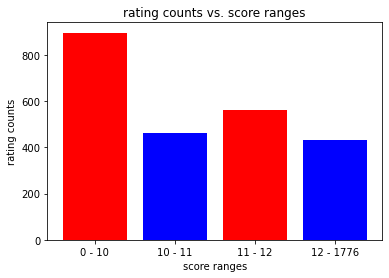

min       0.0
25%      10.0
50%      11.0
75%      12.0
max    1776.0
Name: rating_numerator, dtype: float64

In [78]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = twitter_df_master['rating_numerator'].describe()[['min', '25%', '50%', '75%', 'max']]

# Labels for the four rating ranges
bin_names = ['0 - 10' ,'10 - 11' ,'11 - 12' ,'12 - 1776' ] # Name each acidity level category

# Creates rating_range column
twitter_df_master['rating_range'] = pd.cut(twitter_df_master['rating_numerator'], bin_edges, labels=bin_names)

counts = twitter_df_master['rating_range'].value_counts()
rating_range_counts = [counts['0 - 10'], counts['10 - 11'],counts['11 - 12'], counts['12 - 1776']] 


# Lets plot
plt.bar(bin_names, rating_range_counts, color = ['red', 'blue' ])    
plt.title('rating counts vs. score ranges')
plt.xlabel("score ranges")
plt.ylabel("rating counts");
plt.show()

# Lets check propotion below or equal to rating of 15
disp(bin_edges)


<div style="background-color:rgba(255, 0, 0, 0.1)">
    
### Q3 Response: 

The counts for the quartiles have been visualized, but it should be noted that 99.1% of the rating values are either below or equal to 20, with the max value being 1776.
    
    
</div>

<div style="background-color:rgba(0, 225, 0, 0.1)">
    
# NOTE!

### From here on, for purposes of analyzing plots and patterns we choose to classify rating values greater than 20 as outliers. <br>
    
</div>

In [79]:
# we will use this boolean series for filtering purposes

outlier_check = twitter_df_master['rating_numerator']<=20

<div style="background-color:rgba(0, 225, 0, 0.1)">
    
### Q4: What does the distribution of rating scores look like?<br>
    
</div>

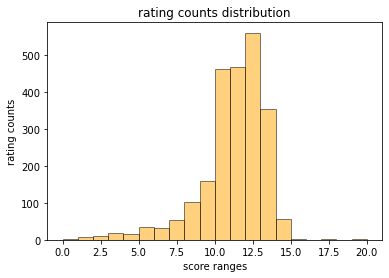

In [80]:
# Lets plot a histogram to see the distribution

# For our analysis we classify all rating values above 20 as outliers

plt.hist(twitter_df_master[outlier_check]['rating_numerator'], edgecolor='black', linewidth=1, color = 'orange', alpha = 0.5, bins = 20);
plt.title('rating counts distribution')
plt.xlabel("score ranges")
plt.ylabel("rating counts");
plt.show()

<div style="background-color:rgba(255, 0, 0, 0.1)">
    
### Q4 Response: 

It can be clearly observed that the ratings are not normally distributed. The distribution is skewed to the left.
    
    
</div>

<div style="background-color:rgba(0, 225, 0, 0.1)">
    
### Q5: Which of the dog stages has the highest expected rating score? <br>
    
</div>

In [81]:
# We will use the groupby function for computing expected rating for various stages

twitter_df_master[outlier_check].groupby(['stage'])['rating_numerator'].mean()

stage
doggo             11.879518
doggo, floofer    11.000000
doggo, pupper     11.250000
doggo, puppo      13.000000
floofer           11.888889
pupper            10.783893
puppo             12.103448
Name: rating_numerator, dtype: float64

<div style="background-color:rgba(255, 0, 0, 0.1)">
    
### Q5 Response: 

The puppo stage has the highest expected rating of 12.1. Doggo and floofer stages have nearly same expectation of around 11.8. Pupper stage has the lowest expectation of 10.8. In cases with more than one stages (doggo, puppo) combination has the highest expected rating of 13.
    
    
</div>

<div style="background-color:rgba(0, 225, 0, 0.1)">
    
### Q6: Investigate the effect of rating score on the retweet counts and favorite counts. Are favorite and retweet counts related to one another?<br>
    
</div>

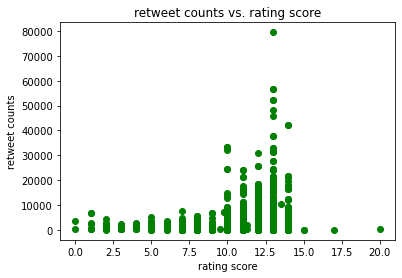

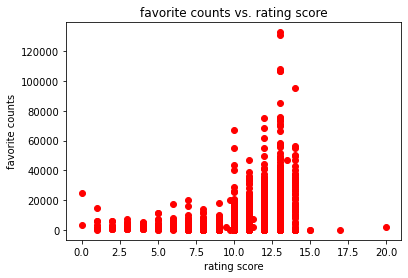

In [82]:
# Lets observe the scatter plots for both variables

plt.figure(0)
plt.scatter(twitter_df_master[outlier_check]['rating_numerator'], twitter_df_master[outlier_check]['retweet_count'], color = 'green')
plt.title('retweet counts vs. rating score')
plt.xlabel("rating score")
plt.ylabel("retweet counts");
plt.show()

plt.figure(0)
plt.scatter(twitter_df_master[outlier_check]['rating_numerator'], twitter_df_master[outlier_check]['favorite_count'], color = 'red')
plt.title('favorite counts vs. rating score')
plt.xlabel("rating score")
plt.ylabel("favorite counts");
plt.show()

In [83]:
# Lets Look at some of the outliers 

Top_ten_rating = twitter_df_master['rating_numerator'].sort_values(ascending = False)[:10]
Top_ten_retweet_count = twitter_df_master['retweet_count'].loc[Top_ten_rating.index]
Top_ten_favorite_count = twitter_df_master['favorite_count'].loc[Top_ten_rating.index]
Top_ten = pd.DataFrame({'rating_numerator' : Top_ten_rating,
                         'retweet_count' : Top_ten_retweet_count,
                           'favorite_count' : Top_ten_favorite_count})
disp(Top_ten)
disp('Average retweet counts',twitter_df_master['retweet_count'].mean())
disp('Average favorite counts',twitter_df_master['favorite_count'].mean())

,rating_numerator,retweet_count,favorite_count
977,1776.0,2772,5569
188,666.0,1058,4407
187,420.0,27,320
2072,420.0,4324,7989
1118,204.0,1434,4196
289,182.0,370,1824
900,165.0,2539,5316
1777,144.0,1104,3323
1632,143.0,239,1369
1633,121.0,1563,4225


'Average retweet counts'

3164.7973661852166

'Average favorite counts'

8080.968564146135

<div style="background-color:rgba(255, 0, 0, 0.1)">
    
### Q6 Response: 

The scatter plots reveal a very interesting pattern. Both the retweet and favorite counts seem to exponentially increase with the rating score, eventually maxing out at a value close to 13 and then start to decline sharply. It seems like people start viewing scores as "unfair" after a certain point.<br><br>
We also looked at the data for outliers and found out that the almost all of the retweet and favorite counts were below even than the average numbers.
    
    
</div>

<div style="background-color:rgba(0, 225, 0, 0.1)">
    
### Q7: How does the average probability for number first choice of breed vary with the number of images available? <br>
    
</div>

In [84]:
image_predictions_df_clean.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


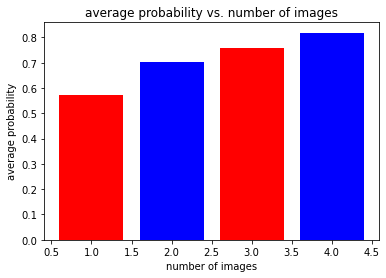

In [85]:
# the get the average probabilities using groupby method

average_prob = image_predictions_df_clean.groupby(['img_num'])['p1_conf'].mean()
plt.bar(average_prob.index, average_prob, color = ['red', 'blue' ])    
plt.title('average probability vs. number of images')
plt.xlabel("number of images")
plt.ylabel("average probability");
plt.show()

<div style="background-color:rgba(255, 0, 0, 0.1)">
    
### Q7 Response: 

It is evident from the chart that the prediction probability for first choice of breed significantly increases with the number of images available, in an almost linear fashion.
    
</div>

<div style="background-color:rgba(0, 225, 0, 0.1)">
    
### Q8: What is the 95% confidence interval for for the expected p1_conf for dogs with only 1 image available? <br> 
    
</div>

In [86]:
# We are going to use boorstrapping to get the confidence interval 

one_image_prediction_df =  image_predictions_df_clean[image_predictions_df_clean['img_num']==1]
mean_prob = []
for i in range(10000):
    bootsample = one_image_prediction_df.sample(one_image_prediction_df.shape[0], replace =True)
    mean_prob.append(bootsample['p1_conf'].mean())
    
confidence_interval = (np.percentile(mean_prob, 2.5),np.percentile(mean_prob, 97.5))
disp(confidence_interval)

(0.5598832810323034, 0.5850630085266857)

<div style="background-color:rgba(255, 0, 0, 0.1)">
    
### Q8 Response: 

The 95% confidence interval for expected prediction probability for first choice of breed for dogs with only one image available is [0.559, 0.585]   
    
</div>

<div style="background-color:rgba(0, 225, 0, 0.1)">
    
### Q9: Which are the top five most popular breeds of dogs (most likely) featured on WeRateDogs page? <br>
    
</div>

<div style="background-color:rgba(0, 225, 0, 0.1)">
    
# NOTE!

### For analyzing data for dog breeds, from here on, we will assume that p1 "IS the right prediction".<br>
    
</div>

In [87]:
image_prediction_p1_data = image_predictions_df_clean[image_predictions_df_clean['p1_dog'] == True].copy()

In [88]:
image_prediction_p1_data.p1.value_counts()[:5]

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
Name: p1, dtype: int64

<div style="background-color:rgba(255, 0, 0, 0.1)">
    
### Q9 Response: 

The top five most popular breeds of dogs featured on WeRateDogs page are Golden Retriever, Labrador Retriever, Pembroke, Chihuahua and Pug.   
    
</div>

<div style="background-color:rgba(0, 225, 0, 0.1)">
    
### Q10: Which three dog breeds (most likely) have the highest expected rating score? Is there a link between rarity of dog breed and the rating score?<br>
    
</div>

<div style="background-color:rgba(0, 225, 0, 0.1)">
    
# NOTE!

### For analyzing the next two parts (10 and 11) we will merge the image predictions data with the twitter master archive.
    
</div>

In [89]:
grand_twitter_df =  image_prediction_p1_data.set_index('tweet_id').join(twitter_df_master.set_index('tweet_id'), how='inner')

grand_twitter_df = grand_twitter_df.reset_index()
grand_twitter_df = grand_twitter_df.rename(columns = {'index':'tweet_id'})
disp(grand_twitter_df.shape)
disp(grand_twitter_df.head())


(1531, 31)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,source,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,source_app,rating_range
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,532,2535,False,False,en,Twitter for iPhone,0 - 10
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,48,132,False,False,en,Twitter for iPhone,0 - 10
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,47,128,False,False,en,Twitter for iPhone,0 - 10
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,147,311,False,False,en,Twitter for iPhone,0 - 10
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,41,111,False,False,en,Twitter for iPhone,0 - 10


In [90]:
# For this part we will analyze dogs only with value counts higher than 5 to get reasonable results
# and make sure that they are are actually dog breeds

dog_counts = grand_twitter_df.p1.value_counts()
dog_counts = dog_counts[dog_counts > 5]
dog_avg_ratings = grand_twitter_df.groupby(['p1'])['rating_numerator'].mean().sort_values(ascending = False)
dog_names = dog_counts.index
disp(dog_avg_ratings)

p1
soft-coated_wheaten_terrier    25.454545
West_Highland_white_terrier    15.642857
Great_Pyrenees                 14.928571
borzoi                         14.444444
Labrador_retriever             13.770000
                                 ...    
Scotch_terrier                  9.000000
Norwich_terrier                 9.000000
Welsh_springer_spaniel          9.000000
Ibizan_hound                    9.000000
Japanese_spaniel                5.000000
Name: rating_numerator, Length: 111, dtype: float64

,ratings,rarity
golden_retriever,13.110000,150
Labrador_retriever,13.770000,100
Pembroke,11.443182,88
Chihuahua,10.807229,83
pug,10.315789,57


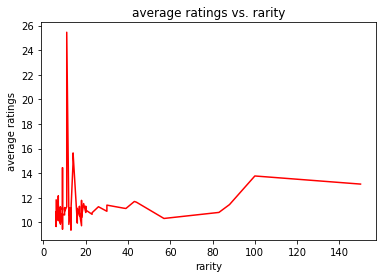

In [91]:
ratings_vs_rarity_df = pd.DataFrame()
ratings_vs_rarity_df['ratings'] = dog_avg_ratings[dog_names]
ratings_vs_rarity_df['rarity'] = dog_counts[dog_names]
disp(ratings_vs_rarity_df.head())

# lets make a line plot (rarity represents the occurance count of the dog breeds)

plt.plot(ratings_vs_rarity_df['rarity'], ratings_vs_rarity_df['ratings'], linewidth = 1.5, color = 'red')
plt.title('average ratings vs. rarity')
plt.xlabel("rarity")
plt.ylabel("average ratings");
plt.show()

<div style="background-color:rgba(255, 0, 0, 0.1)">
    
### Q10 Response: 

The breed with the highest expected rating score is Soft Coated Wheaten Terrier, with West Highland White Terrier and Great Pyrenees at second and third place respectively.<br>
    
A very interesting behavior is revealed here. The curve smooths out as the rarity decreases, ratings become more consistent with respect to rarity as it decreases.
    
</div>

<div style="background-color:rgba(0, 225, 0, 0.1)">
    
### Q11: Does the favorite count depend or breed rarity?

    
</div>

,ratings,rarity,favorite_count
golden_retriever,13.110000,150,11310.846667
Labrador_retriever,13.770000,100,11238.500000
Pembroke,11.443182,88,11304.034091
Chihuahua,10.807229,83,8149.891566
pug,10.315789,57,5617.947368


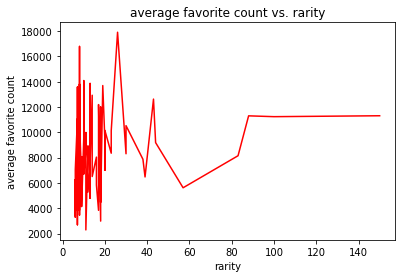

In [92]:
dog_avg_favorite_counts = grand_twitter_df.groupby(['p1'])['favorite_count'].mean().sort_values(ascending = False)
ratings_vs_rarity_df['favorite_count'] = dog_avg_favorite_counts[dog_names]
disp(ratings_vs_rarity_df.head())

# lets make a line plot (rarity represents the occurance count of the dog breeds)

plt.plot(ratings_vs_rarity_df['rarity'], ratings_vs_rarity_df['favorite_count'], linewidth = 1.5, color = 'red')
plt.title('average favorite count vs. rarity')
plt.xlabel("rarity")
plt.ylabel("average favorite count");
plt.show()

<div style="background-color:rgba(255, 0, 0, 0.1)">
    
### Q11 Response: 

Similar behavior is observed as in the case of ratings. The curve smooths out as the rarity decreases, People seem to like  a breed more consistently with respect to rarity. The more a breed is seen, easier it is for people to make up their minds.
    
</div>

<div style="background-color:rgba(255, 0, 0, 0.15)">    

# Saving the final form of data frame (in both csv files and sql databases)
    
## we save the dataframe formed by merging the three clean datasets
</div>

<div style="background-color:rgba(0, 225, 0, 0.1)">
    
### csv files
   
</div>

In [93]:
# Lets first save in the csv format

grand_twitter_df.to_csv('twitter_archive_master.csv', index = False)

<div style="background-color:rgba(0, 225, 0, 0.1)">
    
### sql database files
   
</div>

In [94]:
from sqlalchemy import create_engine

# sql engine causing error for some incompatable data types
# Lets convert these columns to strings for storing

grand_twitter_df['display_text_range'] = grand_twitter_df['display_text_range'].astype(str)
grand_twitter_df['entities'] = grand_twitter_df['entities'].astype(str)
grand_twitter_df['user'] = grand_twitter_df['user'].astype(str)

engine = create_engine('sqlite:///twitter_archive_master.db')

grand_twitter_df.to_sql('twitter_archive_master_v1.0', engine, index=False, if_exists='replace')

<div style="background-color:rgba(0, 225, 0, 0.1)">

## References
    
twitter: https://twitter.com/

stackoverflow: https://stackoverflow.com/

pandas documentation: https://pandas.pydata.org/docs/

matplotlib documentation: https://matplotlib.org/3.3.3/contents.html
    
numpy documentation: https://numpy.org/doc/

</div>